In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib inline

In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The sav

# Read fiels

In [2]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210605,210612,210619,210626,210703,210710,210717,210724,210731,210807,210814,210821,210828,210904]

turnstiles_df = get_data(week_nums)

# Cleaning and Preprocessing

In [3]:
#take just 3 months: 6,7,8
turnstiles_df = turnstiles_df[(turnstiles_df['DATE'] > '05/31/2021') & (turnstiles_df['DATE'] < '09/01/2021')]

In [4]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
18,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/01/2021,00:00:00,REGULAR,7579653,2590651
19,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/01/2021,04:00:00,REGULAR,7579663,2590654
20,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/01/2021,08:00:00,REGULAR,7579674,2590716
21,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/01/2021,12:00:00,REGULAR,7579736,2590840
22,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/01/2021,16:00:00,REGULAR,7579916,2590894
...,...,...,...,...,...,...,...,...,...,...,...
209711,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,05:00:00,REGULAR,5554,616
209712,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,09:00:00,REGULAR,5554,616
209713,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,13:00:00,RECOVR AUD,5554,616
209714,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,17:00:00,REGULAR,5554,616


In [5]:
#check if there is null value
turnstiles_df.isnull().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

In [6]:
#strip the columns name
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [7]:
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

In [8]:
#check if there is duplicate entry
turnstiles_df[turnstiles_df[['C/A','UNIT','SCP','STATION','DATE_TIME']].duplicated()]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
77063,N213,R154,00-00-00,TREMONT AV,BD,IND,06/23/2021,05:00:00,RECOVR AUD,3682482,2760115,2021-06-23 05:00:00
77274,N213,R154,00-00-05,TREMONT AV,BD,IND,06/23/2021,05:00:00,RECOVR AUD,369307075,100833056,2021-06-23 05:00:00
90214,N335,R158,01-00-03,KEW GARDENS,EF,IND,06/20/2021,18:30:00,RECOVR AUD,5201960,17258853,2021-06-20 18:30:00
90257,N335,R158,01-00-04,KEW GARDENS,EF,IND,06/20/2021,18:30:00,RECOVR AUD,6718777,26526664,2021-06-20 18:30:00
90718,N336,R158,00-00-05,KEW GARDENS,EF,IND,06/20/2021,18:30:00,RECOVR AUD,8833758,2334263,2021-06-20 18:30:00
188380,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,00:00:00,RECOVR AUD,262243,0,2021-07-22 00:00:00
188382,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,04:00:00,RECOVR AUD,262243,0,2021-07-22 04:00:00
188386,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,08:00:00,RECOVR AUD,262243,0,2021-07-22 08:00:00
188388,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,12:00:00,RECOVR AUD,262243,0,2021-07-22 12:00:00
190326,R523,R147,00-00-07,61 ST WOODSIDE,7,IRT,08/18/2021,05:00:00,RECOVR AUD,22112575,4491111,2021-08-18 05:00:00


In [9]:
#delete the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [10]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
209715,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,21:00:00,REGULAR,5554,616,2021-08-31 21:00:00
209714,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,17:00:00,REGULAR,5554,616,2021-08-31 17:00:00
209713,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,13:00:00,RECOVR AUD,5554,616,2021-08-31 13:00:00
209712,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,09:00:00,REGULAR,5554,616,2021-08-31 09:00:00
209711,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,05:00:00,REGULAR,5554,616,2021-08-31 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
22,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/01/2021,16:00:00,REGULAR,7579916,2590894,2021-06-01 16:00:00
21,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/01/2021,12:00:00,REGULAR,7579736,2590840,2021-06-01 12:00:00
20,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/01/2021,08:00:00,REGULAR,7579674,2590716,2021-06-01 08:00:00
19,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/01/2021,04:00:00,REGULAR,7579663,2590654,2021-06-01 04:00:00


In [11]:
turnstiles_df.reset_index(drop = True,inplace = True)

# EDA

In [12]:
#take the maximum value of each turnstile for each date
turnstiles_daily = turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)['ENTRIES','EXITS'].max()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [13]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,06/01/2021,7580178,2590917
1,A002,R051,02-00-00,59 ST,06/02/2021,7580754,2591200
2,A002,R051,02-00-00,59 ST,06/03/2021,7581328,2591445
3,A002,R051,02-00-00,59 ST,06/04/2021,7581863,2591617
4,A002,R051,02-00-00,59 ST,06/05/2021,7582248,2591700


In [14]:
#store the PREV_ENTRIES and PREV_EXITS for each row
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES","PREV_EXITS"]] = (turnstiles_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES","EXITS"].apply(lambda grp: grp.shift(1)))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [15]:
#Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [16]:
#check for the turnstiles that the cmulative number of ENTRIES or EXITS come reveres
turnstiles_daily[(turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]) |(turnstiles_daily["EXITS"] < turnstiles_daily["PREV_EXITS"]) ]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
3589,A011,R080,01-03-00,57 ST-7 AV,06/02/2021,885601049,489575017,06/01/2021,8.856013e+08,4.895759e+08
3590,A011,R080,01-03-00,57 ST-7 AV,06/03/2021,885600810,489574126,06/02/2021,8.856010e+08,4.895750e+08
3591,A011,R080,01-03-00,57 ST-7 AV,06/04/2021,885600584,489573250,06/03/2021,8.856008e+08,4.895741e+08
3592,A011,R080,01-03-00,57 ST-7 AV,06/05/2021,885600355,489572377,06/04/2021,8.856006e+08,4.895732e+08
3593,A011,R080,01-03-00,57 ST-7 AV,06/06/2021,885600163,489571614,06/05/2021,8.856004e+08,4.895724e+08
...,...,...,...,...,...,...,...,...,...,...
455663,R730,R431,00-00-04,EASTCHSTER/DYRE,08/28/2021,1559799524,1728254710,08/27/2021,1.559800e+09,1.728255e+09
455664,R730,R431,00-00-04,EASTCHSTER/DYRE,08/29/2021,1559799443,1728254732,08/28/2021,1.559800e+09,1.728255e+09
455665,R730,R431,00-00-04,EASTCHSTER/DYRE,08/30/2021,1559799422,1728254826,08/29/2021,1.559799e+09,1.728255e+09
455666,R730,R431,00-00-04,EASTCHSTER/DYRE,08/31/2021,1559799298,1728254931,08/30/2021,1.559799e+09,1.728255e+09


In [17]:
#to solve the problem of reverse ENTRIES
def get_daily_counts_entries(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        #print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily['DAILY_ENTRIES'] = turnstiles_daily.apply(get_daily_counts_entries, axis=1, max_counter=1000000)

In [18]:
#to solve the problem of reverse EXITS
def get_daily_counts_exits(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        #print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily['DAILY_EXITS'] = turnstiles_daily.apply(get_daily_counts_exits, axis=1, max_counter=1000000)

In [19]:
#Sum DAILY_ENTRIES and DAILY_EXITS
turnstiles_daily['SUM_DAILY_ENTRIES_DAILY_EXITS'] = turnstiles_daily['DAILY_ENTRIES'] + turnstiles_daily['DAILY_EXITS'] 

In [20]:
#Find the station_daily ENTRIES and EXITS
station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['SUM_DAILY_ENTRIES_DAILY_EXITS']].sum().reset_index()
station_daily.head()

,STATION,DATE,SUM_DAILY_ENTRIES_DAILY_EXITS
0,1 AV,06/02/2021,21060.0
1,1 AV,06/03/2021,20875.0
2,1 AV,06/04/2021,21762.0
3,1 AV,06/05/2021,19085.0
4,1 AV,06/06/2021,16614.0


In [21]:
#Find the station_totals ENTRIES and EXITS
station_totals = station_daily.groupby('STATION').sum().sort_values('SUM_DAILY_ENTRIES_DAILY_EXITS', ascending=False).reset_index()
station_totals.head()

,STATION,SUM_DAILY_ENTRIES_DAILY_EXITS
0,34 ST-PENN STA,11080099.0
1,34 ST-HERALD SQ,8376579.0
2,FULTON ST,7617145.0
3,PATH NEW WTC,7235349.0
4,86 ST,7097257.0


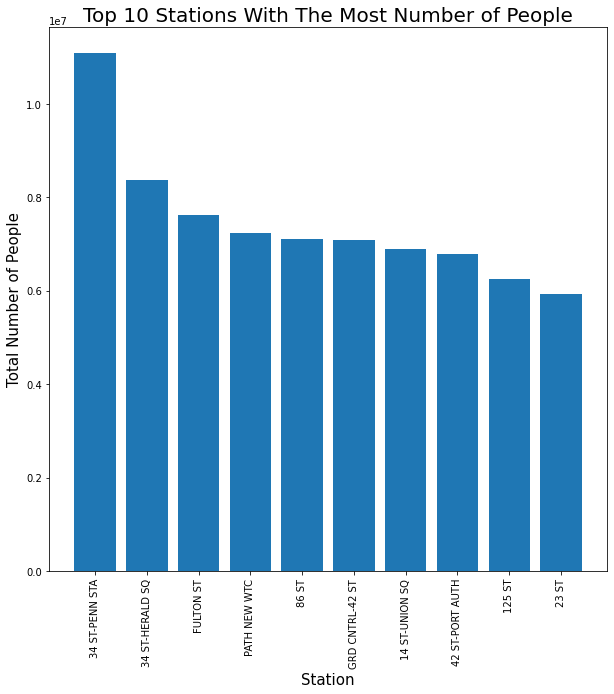

In [22]:
#top 10 stations that have the most people
plt.figure(figsize=(10,10))
plt.bar(x=station_totals['STATION'][:10], height=station_totals['SUM_DAILY_ENTRIES_DAILY_EXITS'][:10])
plt.xlabel('Station',fontsize=15)
plt.ylabel('Total Number of People',fontsize=15)
plt.title('Top 10 Stations With The Most Number of People',fontsize=20)
plt.xticks(rotation=90);

# Conclusion
The goal of this project is to analyze the Metropolitan Transportation Authority (MTA) Turnstile Data to see which stations have a lot of people to help the Café chain to determine the places where they will open new branches.

To start exploring this goal, I will sum the daily entries and daily exits to find the total number of people that have passed through the station.

The figure depicts the top 10 stations that have the most people.

This result shows that the top 3 stations with the most people are: 34 ST-PENN STA, 34 ST-HERALD SQ, FULTON ST.